In [1]:
#problem 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import torch

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
def model(t_u, w, b):
    return w[1]*t_u**2 + w[0]*t_u + b
def linear_model(t_u, w, b):
    return w*t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [5]:
def dloss_fn(t_p, t_c): 
    dsq_diffs=2*(t_p-t_c)/t_p.size(0)
    return dsq_diffs

def dmodel_dw1(t_u, w, b):
    return t_u

def dmodel_dw2(t_u, w, b):
    return t_u

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [6]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw2 = dloss_dtp*dmodel_dw2(t_u, w[1], b)
    dloss_dw1 = dloss_dtp*dmodel_dw1(t_u, w[0], b)
    dloss_db = dloss_dtp*dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])

def linear_grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp*dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp*dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [7]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        w = np.zeros(2)
        
        w[0] = params[0]; w[1] = params[1]; b = params[2]
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        
        params = params - learning_rate*grad
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

def linear_training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):      
        w, b = params
        t_p = linear_model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = linear_grad_fn(t_u, t_c, t_p, w, b)
        
        params = params - learning_rate*grad
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [22]:
t_un = 0.1 * t_u
rate = [.1, .01, .001, .0001]
for r in rate:
    print("\nRate: ", r)
    print("Linear training")
    params = training_loop(n_epochs = 5000, learning_rate = r, params = torch.tensor([1.0, 1.0, 0]), t_u = t_un, t_c = t_c)


Rate:  0.1
Linear training
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan

Rate:  0.01
Linear training
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan

Rate:  0.001
Linear training
Epoch 500, Loss 8.035689
Epoch 1000, Loss 6.636409
Epoch 1500, Loss 5.582901
Epoch 2000, Loss 4.790622
Epoch 2500, Loss 4.195589
Epoch 3000, Loss 3.749397
Epoch 3500, Loss 3.415423
Epoch 4000, Loss 3.165985
Epoch 4500, Loss 2.980155
Epoch 5000, Loss 2.842138

Rate:  0.0001
Linear training
Epoch 500, Loss 9.678580
Epoch 1000, Loss 9.474418
Epoch 1500, Loss 9.275946
Epoch 2000, Loss 9.082996
Epoch 2500, Loss 8.895410
Epoch 3000, Loss 8.713042
Epoch 3500, Loss 8.535755
Epoch 4000, Loss 8.36342

In [20]:
#Training non-linear model at the best rate found
r = .001
print("Non-linear training")
params = training_loop(n_epochs = 5000, learning_rate = r, params = torch.tensor([1.0, 1.0, 0]), t_u = t_un, t_c = t_c)

#comparing against the linear model at best learning rate
print("\nLinear training")
params_linear = linear_training_loop(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 0]), t_u = t_un, t_c = t_c)

Non-linear training
Epoch 500, Loss 8.035689
Epoch 1000, Loss 6.636409
Epoch 1500, Loss 5.582901
Epoch 2000, Loss 4.790622
Epoch 2500, Loss 4.195589
Epoch 3000, Loss 3.749397
Epoch 3500, Loss 3.415423
Epoch 4000, Loss 3.165985
Epoch 4500, Loss 2.980155
Epoch 5000, Loss 2.842138

Linear training
Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648


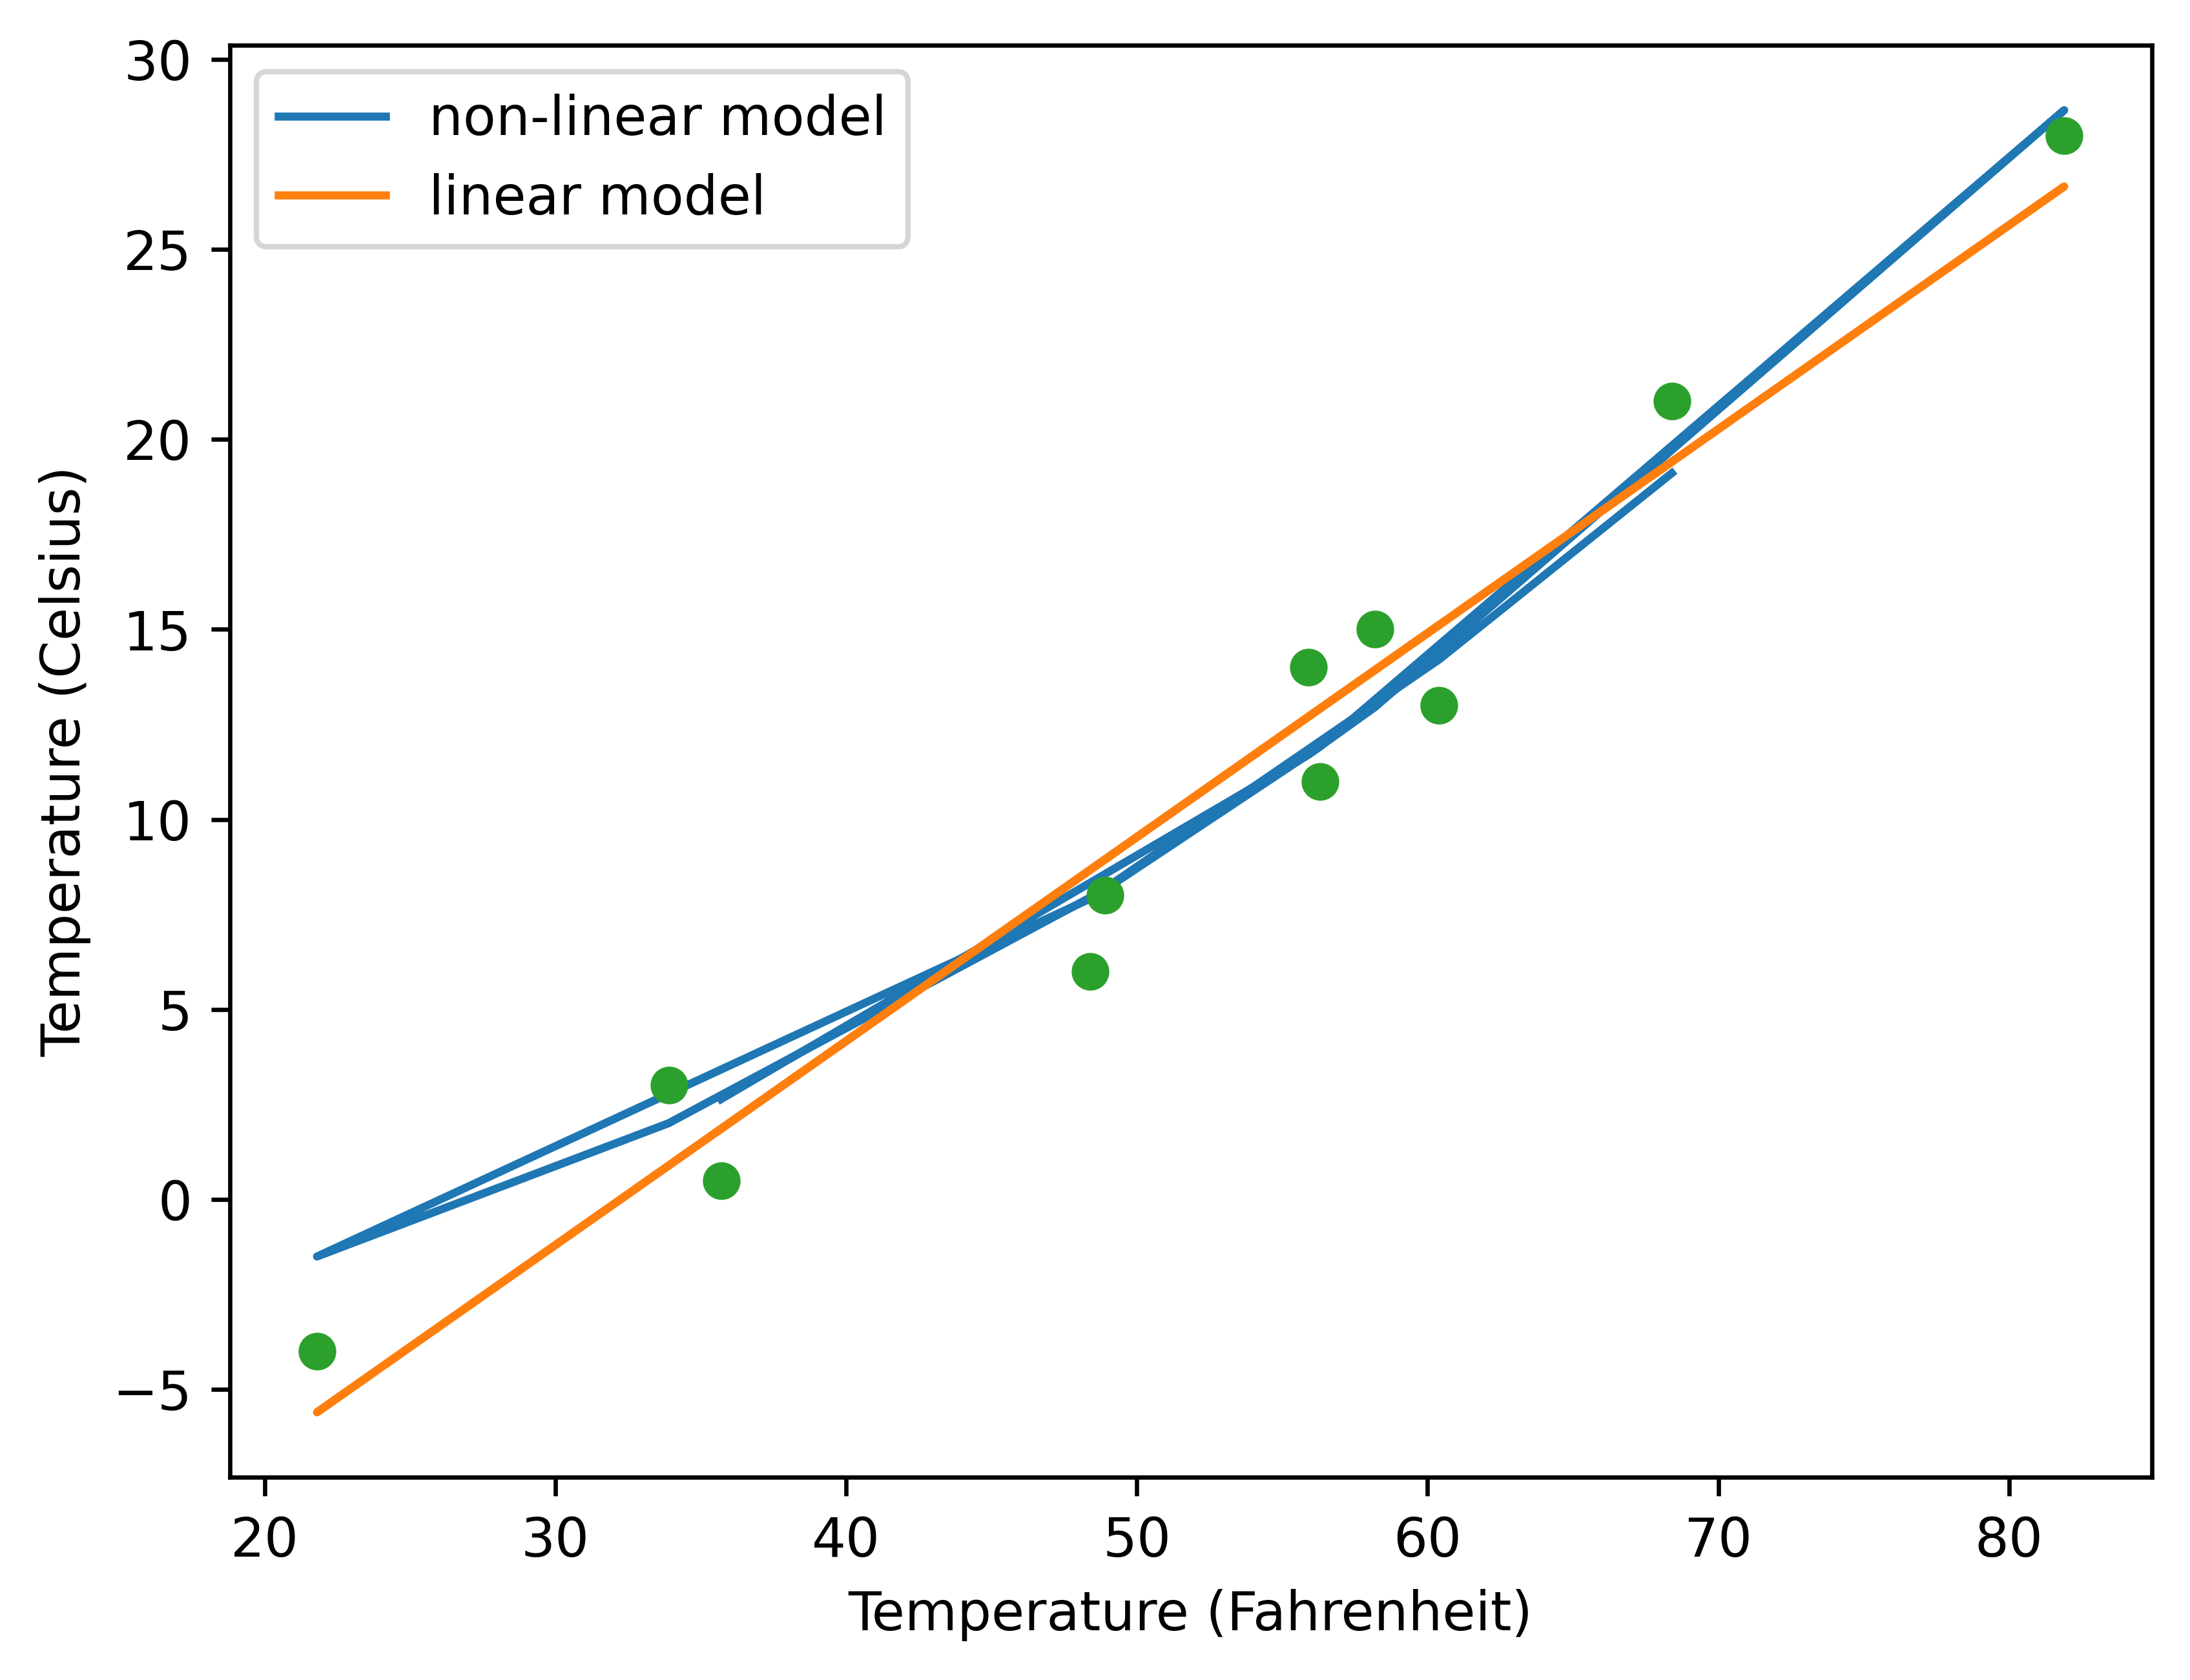

In [21]:
fig = plt.figure(dpi=600)
w = np.zeros(2)
w[0] = params[0]; w[1] = params[1]
t_p = model(t_un, w, params[2])

plt.plot(t_u.numpy(), t_p.detach().numpy(), label = 'non-linear model')

t_p = linear_model(t_un, *params_linear)
plt.plot(t_u.numpy(), t_p.detach().numpy(), label = 'linear model')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.legend()